# TEMPLATE 2 - MODEL

### Libraries

In [114]:
import pandas as pd     # DataFrame management
import numpy as np      # Matri calculations
import matplotlib.pyplot as plt    # Visualization
import seaborn as sns              # Visualization

import warnings
warnings.filterwarnings("ignore")  # Disable warnings

from pickle import dump    # save compressed files

### Load clean data

In [115]:
df = pd.read_csv('malware_preprocessed.csv')

In [116]:
df

,Unnamed: 0,AVProductsInstalled,HasDetections,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,SkuEdition_Home,SkuEdition_Pro,Census_MDC2FormFactor_Desktop,...,SmartScreen_RequireAdmin,Firewall_1.0,Census_HasOpticalDiskDrive_1,Census_GenuineStateName_IS_GENUINE,Census_FlightRing_Retail,Census_IsSecureBootEnabled_1,Census_IsTouchEnabled_1,Census_IsPenCapable_1,Census_IsAlwaysOnAlwaysConnectedCapable_1.0,Wdft_IsGamer_1.0
0,0,0.00,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,0.00,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4,0.25,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,0.00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
499996,499996,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
499997,499997,0.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
499998,499998,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [117]:
del df['Unnamed: 0']

In [118]:
df.shape

(500000, 42)

### Split X-y

In [119]:
target = 'HasDetections'
features = df.columns[df.columns != target]

In [120]:
y = df[target]
X = df[features]

### Target distribution

In [121]:
y.value_counts()

0.0    250047
1.0    249953
Name: HasDetections, dtype: int64

In [122]:
y.value_counts() / df.shape[0] * 100

0.0    50.0094
1.0    49.9906
Name: HasDetections, dtype: float64

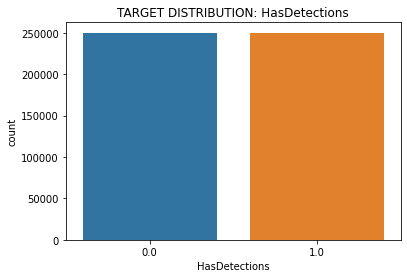

In [123]:
sns.countplot(y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

### Split TRAIN-TEST data

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

## TRAIN-VALIDATION

### Model Competition

We test a collection of models with the objective of achieving the best model performance on VALIDATION data.

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [128]:
def AUC(model,X,y):
  return roc_auc_score(y,model.predict_proba(X)[:,1])

def cross_validation(model,X,y):
  Kfold_metric = cross_val_score(model, X, y, cv=4, scoring='roc_auc')
  return Kfold_metric.mean()

# Inicializa resultados
label_ = []
metric_train_ = []
metric_valida_ = []

def evaluate_model(label, model, X, y):
  model.fit(X,y)
  metric_train = AUC(model,X,y)
  metric_valida = cross_validation(model,X,y)
  
  label_.append(label)
  metric_train_.append(metric_train)
  metric_valida_.append(metric_valida)
  return pd.DataFrame({'Model': label_,
                      'AUC Train': metric_train_,
                      'AUC Cross-Valida': metric_valida_
                      }).sort_values('AUC Cross-Valida')

In [129]:
evaluate_model(label='Gradient Boosting', 
                    model = GradientBoostingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Gradient Boosting,0.651499,0.650821


In [130]:
evaluate_model(label='Logistic Regression', 
                    model = LogisticRegression(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,Logistic Regression,0.641660,0.641284
0,Gradient Boosting,0.651499,0.650821


In [131]:
from sklearn.naive_bayes import BernoulliNB

In [132]:
evaluate_model(label='BernoulliNB', 
                    model = BernoulliNB(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,BernoulliNB,0.614014,0.613731
1,Logistic Regression,0.641660,0.641284
0,Gradient Boosting,0.651499,0.650821


In [133]:
from sklearn.ensemble import AdaBoostClassifier

In [134]:
evaluate_model(label='AdaBoost', 
                    model = AdaBoostClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,BernoulliNB,0.614014,0.613731
3,AdaBoost,0.639786,0.639612
1,Logistic Regression,0.641660,0.641284
0,Gradient Boosting,0.651499,0.650821


In [135]:
import xgboost as xgb

In [136]:
evaluate_model(label='XGBoost', 
                    model = xgb.XGBClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,BernoulliNB,0.614014,0.613731
3,AdaBoost,0.639786,0.639612
1,Logistic Regression,0.641660,0.641284
4,XGBoost,0.651665,0.650819
0,Gradient Boosting,0.651499,0.650821


### Hyperparameter tuning

We tested different configurations of the parameters of the winning model in the model tournament in order to get the best performance of the model on the VALIDATION data.

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
parameters_hp = {
    'learning_rate': [0.01,0.1,0.5],
    'max_depth': [4,6,8],
    'tree_method': ['hist']
}

In [139]:
search_hp = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                               param_distributions = parameters_hp,
                               scoring='roc_auc',     # metrics to be optimized: AUC
                               cv = 5,                # number of folds for cross-validation
                               n_iter = 50,           # number of iterations, each one will test a different configuration.
                               n_jobs=-1, 
                               verbose=True)

In [140]:
search_hp.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [4, 6, 8],
                                        'tree_method': ['hist']},
                   scoring='roc_auc', verbose=True)

In [141]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: XGBClassifier(max_depth=6, random_state=42, tree_method='hist')

 The best AUC: 0.6609990441796583

 The best parameters across ALL searched params:
 {'tree_method': 'hist', 'max_depth': 6, 'learning_rate': 0.1}


### Select best model

In [142]:
best_model = search_hp.best_estimator_

In [143]:
#Save model
dump(best_model, open('model.pkl', 'wb'))

### TEST

* Evaluation of performance metrics in TEST.
  * Classification: AUC, ROC curve, F1-score, Accuracy, Precision, Recall.

In [144]:
y_train_pred = best_model.predict(X_train)                        # model predictions on TRAIN data
y_test_pred = best_model.predict(X_test)                          # model predictions on TEST data

In [145]:
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]      # probability of success (1) as modeled in the TRAIN data
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]        # probability of success (1) as modeled in the TEST data

AUC

In [146]:
from sklearn.metrics import roc_auc_score

In [147]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # TRAIN AUC
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # TEST AUC

In [148]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.6692
AUC Test: 0.6593


In [149]:
#The most optimal AUC is the one closest to 1. In this case, the train and the test have low values but we have not been able to improve them further.

ROC Curve

In [150]:
from sklearn.metrics import roc_curve

In [151]:
# Metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

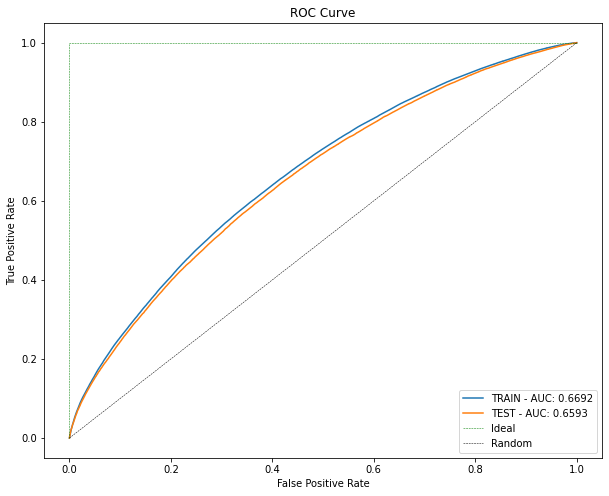

In [152]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [153]:
#In this case we see the train curve is moderately higher than the test curve.
#If the difference were greater, we would be talking about overfitting but this is not the case.
#We can also observe that the curves are not too close to the left and upper axis.
#Therefore, we observe that there is no data leakage (AUC are not close to 1).

Confusion MATRIX

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [155]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

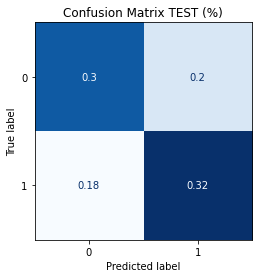

In [156]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

In [157]:
#The distribution of hits and misses can be seen in this matrix.
#We can observe that most of the predictions are positive and negative hits and misses.
#It is correct although higher values are expected in a more effective model.

Accuracy, Precision, Recall y F1-Score

In [158]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [159]:
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [160]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.6135
Precision: 0.6095
Recall: 0.6345
F1-score: 0.6218


In [161]:
#We see that in these metrics, the values, ranging from 0 to 1, are higher than 0.5,
#the objective is to approach 1, so our results are correct but can be improved.

### Interpretability / Explainability

In [162]:
f_importances = best_model.feature_importances_

In [163]:
top_features = pd.DataFrame({'feature': features, 'importance': f_importances})

In [164]:
top_features = top_features.sort_values('importance', ascending=False).reset_index(drop=True)
top_features.head(10)

,feature,importance
0,AVProductsInstalled,0.165264
1,SmartScreen_RequireAdmin,0.087860
2,EngineVersion_1.1.15100.1,0.070928
3,Processor_x64,0.057729
4,Census_IsAlwaysOnAlwaysConnectedCapable_1.0,0.052012
5,Census_OSInstallTypeName_Upgrade,0.051480
6,EngineVersion_1.1.15200.1,0.044163
7,ProductName_win8defender,0.039926
8,Census_OSInstallTypeName_Update,0.032991
9,Wdft_IsGamer_1.0,0.028012


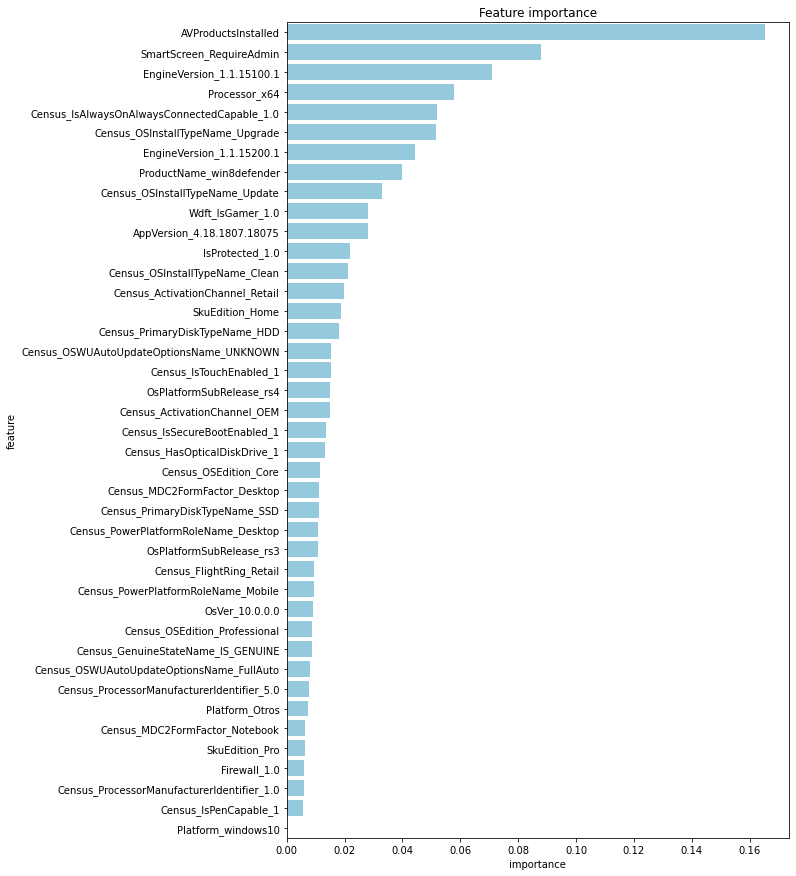

In [165]:
plt.figure(figsize=[9,15])
sns.barplot(data=top_features, y='feature',x='importance',color='skyblue')
plt.title('Feature importance')
plt.show()

In [ ]:
#We see in the plot that the most decisive feature for the detection of a virus is the 'AVProductsInstalled'.